<a href="https://colab.research.google.com/github/FilaPuspitaSari/PengolahanCitra/blob/main/CNN_G_211_22_0009.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install tensorflow matplotlib scikit-learn

import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

Shape data training: (60000, 28, 28, 1)
Shape data testing: (10000, 28, 28, 1)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 43s 90ms/step - accuracy: 0.8516 - loss: 0.5092 - val_accuracy: 0.9831 - val_loss: 0.0536
Epoch 2/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 88ms/step - accuracy: 0.9819 - loss: 0.0576 - val_accuracy: 0.9826 - val_loss: 0.0518
Epoch 3/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 44s 94ms/step - accuracy: 0.9876 - loss: 0.0430 - val_accuracy: 0.9871 - val_loss: 0.0379
313/313 - 2s - 7ms/step - accuracy: 0.9871 - loss: 0.0379

Akurasi pada data uji: 0.9871000051498413
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.98      0.99      1032
           3       0.99      0.98      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.98      0.99       958
           7  

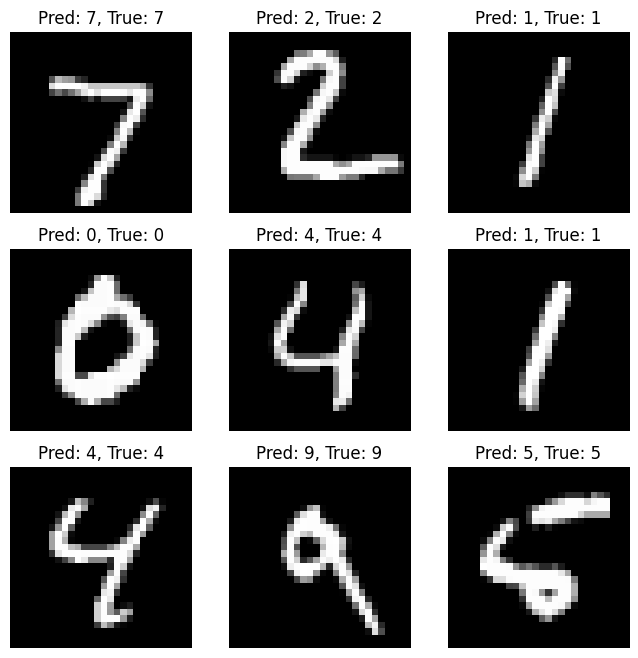

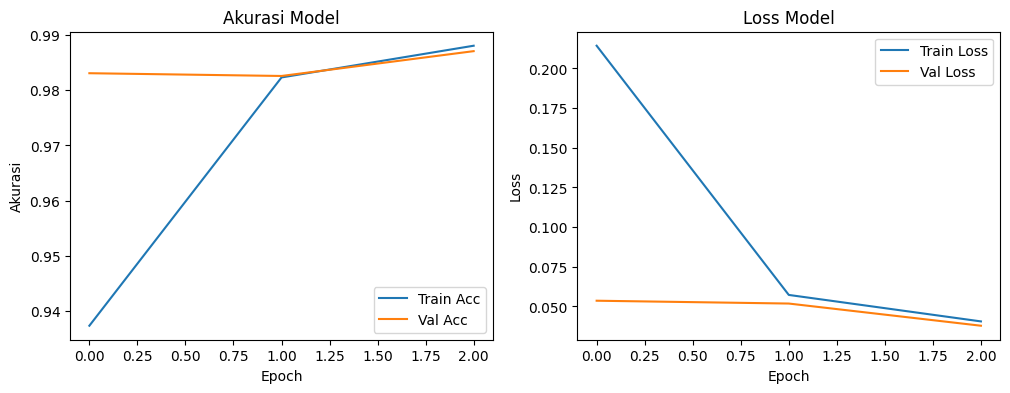

In [4]:
# === 1. Load & Preprocessing Data ===
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train[..., None]
x_test = x_test[..., None]
print("Shape data training:", x_train.shape)
print("Shape data testing:", x_test.shape)

# === 2. Membangun Model CNN ===
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# === 3. Kompilasi & Training ===
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=3, batch_size=128,
                    validation_data=(x_test, y_test))

# === 4. Evaluasi Model ===
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("\nAkurasi pada data uji:", test_acc)

y_pred = np.argmax(model.predict(x_test), axis=1)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# === 5. Visualisasi Hasil ===
plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    plt.title(f"Pred: {y_pred[i]}, True: {y_test[i]}")
    plt.axis('off')
plt.show()

# === 6. (Opsional) Plot Akurasi dan Loss ===
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Akurasi Model')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

**TUGAS Menggunakan Fashion-MNIST**

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Shape data training: (60000, 28, 28, 1)
Shape data testing: (10000, 28, 28, 1)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 50s 103ms/step - accuracy: 0.7325 - loss: 0.7685 - val_accuracy: 0.8636 - val_loss: 0.3948
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 51s 109ms/step - accuracy: 0.8726 - loss: 0.3572 - val_accuracy: 0.8664 - val_loss: 0.3584
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 44s 93ms/step - accuracy: 0.8886 - loss: 0.3031 - val_accuracy: 0.8889 - val_loss: 0.3165
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 89ms/step - accuracy: 0.9016 - loss: 0.2684 - val_accuracy: 0.8929 - val_loss: 0.2930
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 92ms/step - accuracy: 0.9084 - loss: 0.2487 - val_accuracy: 0.8968 - val_loss: 0.2906
313/313 - 3s - 9ms/step - accuracy: 0.8968 - loss: 0.2906

Akurasi pada data uji: 0.8967999815940857
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.92      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.85 

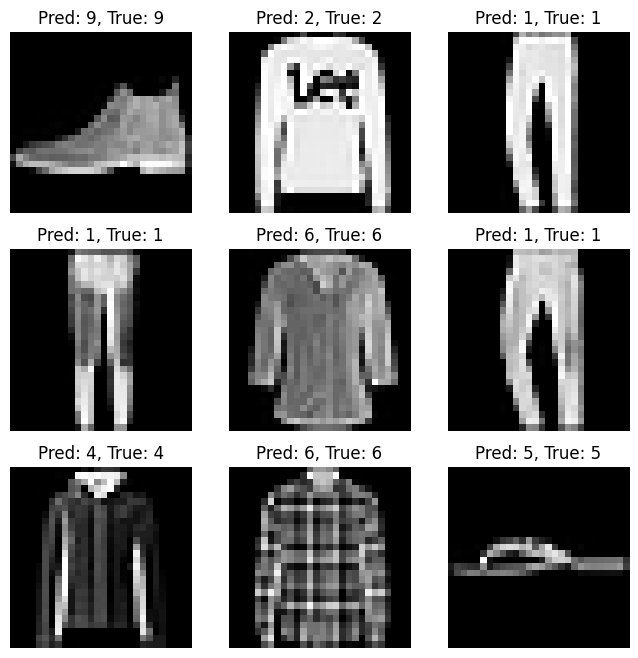

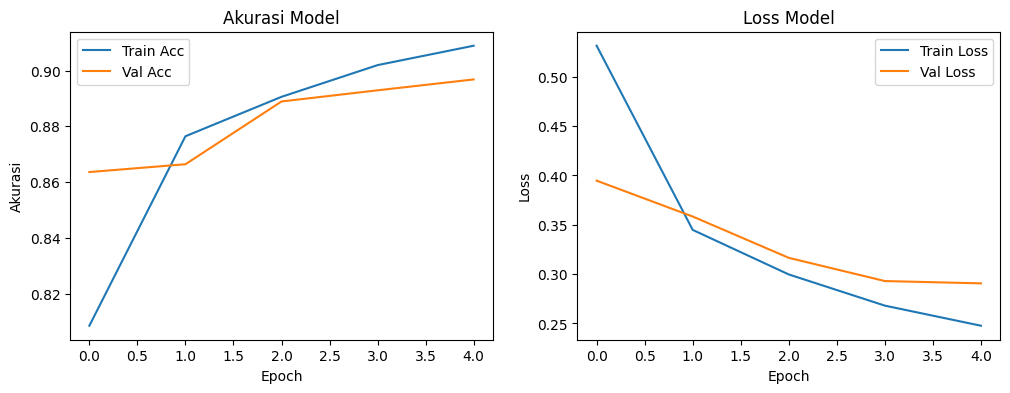

In [5]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

# === 1. Load & Preprocessing Data ===
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train[..., None]  # Tambahkan channel (grayscale)
x_test = x_test[..., None]

print("Shape data training:", x_train.shape)
print("Shape data testing:", x_test.shape)

# === 2. Membangun Model CNN ===
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# === 3. Kompilasi & Training ===
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, batch_size=128,
                    validation_data=(x_test, y_test))

# === 4. Evaluasi Model ===
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("\nAkurasi pada data uji:", test_acc)

y_pred = np.argmax(model.predict(x_test), axis=1)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# === 5. Visualisasi Hasil ===
plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    plt.title(f"Pred: {y_pred[i]}, True: {y_test[i]}")
    plt.axis('off')
plt.show()

# === 6. Plot Akurasi dan Loss ===
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Akurasi Model')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


**TUGAS Menggunakan CIFAR-10**

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Shape data training: (50000, 32, 32, 3)
Shape data testing: (10000, 32, 32, 3)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 64s 159ms/step - accuracy: 0.3145 - loss: 1.8501 - val_accuracy: 0.5163 - val_loss: 1.3396
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 79s 152ms/step - accuracy: 0.5340 - loss: 1.3039 - val_accuracy: 0.5692 - val_loss: 1.2077
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 61s 155ms/step - accuracy: 0.5991 - loss: 1.1344 - val_accuracy: 0.6255 - val_loss: 1.0624
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 81s 152ms/step - accuracy: 0.6467 - loss: 1.0086 - val_accuracy: 0.6492 - val_loss: 1.0064
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 63s 162ms/step - accuracy: 0.6803 - loss: 0.9191 - val_accuracy: 0.6457 - val_loss: 1.0082
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 60s 155ms/step - accuracy: 0.7066 - loss: 0.8467 - val_accuracy: 0.6831 - val_loss: 0.8948
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 58s 149ms/step - accuracy: 0.7291 - loss: 0.7683 - val_accuracy: 0.7044 - val_loss: 0.8514
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 83s 151ms/step - accuracy: 0.7494 - loss: 0

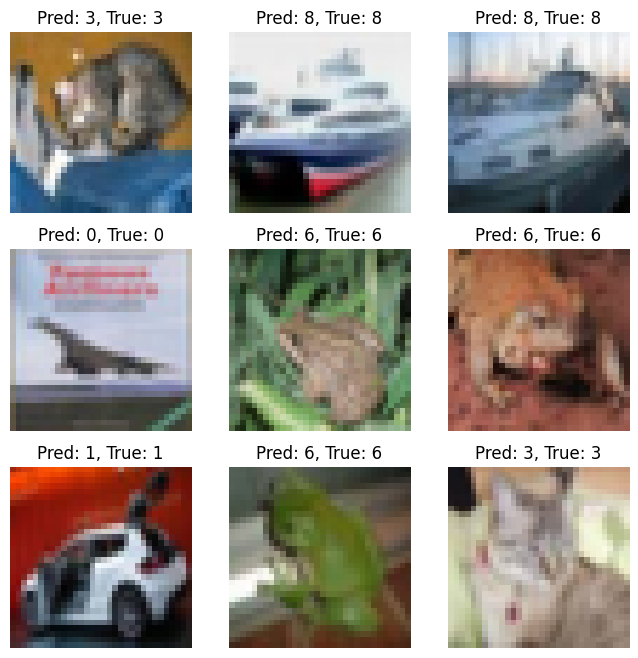

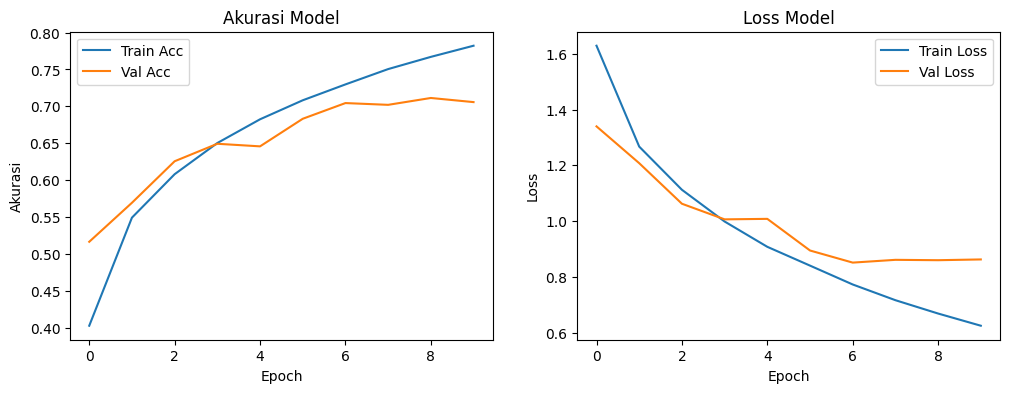

In [6]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

# === 1. Load & Preprocessing Data ===
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

print("Shape data training:", x_train.shape)
print("Shape data testing:", x_test.shape)

# === 2. Membangun Model CNN ===
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# === 3. Kompilasi & Training ===
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, batch_size=128,
                    validation_data=(x_test, y_test))

# === 4. Evaluasi Model ===
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("\nAkurasi pada data uji:", test_acc)

y_pred = np.argmax(model.predict(x_test), axis=1)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# === 5. Visualisasi Beberapa Hasil ===
plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[i])
    plt.title(f"Pred: {y_pred[i]}, True: {y_test[i][0]}")
    plt.axis('off')
plt.show()

# === 6. Plot Akurasi dan Loss ===
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Akurasi Model')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()